
# SDS 3386 Assignment 2

Joe Zhang, Rahul Atre, Mohamed Shakir

## Due Thursday September 29th at 11:59pm, on Brightspace

Total Marks: 10

This is a **group** assignment. You must complete it with **two** other people (except by prior permission), preferably those you have chosen to work on a project with (though this is not required). By the time you submit your assignment, all group members should understand all answers and be able to explain them. I may ask a few people about them.

Start here: Download this file to your laptop, rename or make a copy of it with filename in the format: SDS3386_A2_Name1_Name2_Name3.ipynb, where "Name1" etc. is the last name of a group member. Complete the assignment by editing the file. Edit this first cell of the notebook and replace the second line "2023 Fall, Tanya Schmah" with a list of the full names of all group members. If group members work on different copies of the notebook, then when you're finished you must combine your notebooks into one "clean" copy for submission. When finished, export as HTML, and upload both the jupyter notebook and the HTML file to Brightspace. Each student should submit a copy of the same assignment to Brightspace, with a comment (added in the box on the assignment submission page) that lists the names of your group members.

You may copy and modify code from your Lab exercises, but if you copy more than two lines from another source, note the source in a comment.

# Question 1 (1 mark)

Using the basketball dataset here: https://github.com/fivethirtyeight/data/raw/master/nba-elo/nbaallelo.csv (and described here: https://github.com/fivethirtyeight/data/tree/master/nba-elo), determine the proportion of Home games ('game_location' == 'H') won, and the proportion of Away games won, in the entire dataset.

*Hint: `df.value_counts?`*

In [2]:
import pandas as pd

data = pd.read_csv("https://github.com/fivethirtyeight/data/raw/master/nba-elo/nbaallelo.csv")

home = data.value_counts(data["game_location"])['H']
away = data.value_counts(data["game_location"])["A"]

df1 = data.loc[data['game_location'] == 'H']
df2 = data.loc[data['game_location'] == 'A']

homeWins = data.value_counts(df1["game_result"])["W"]
awayWins = data.value_counts(df2["game_result"])["W"]

percentHomeWins = (homeWins/home)*100
percentAwayWins = (awayWins/away)*100

print("The proportion of Home games won is " + str(percentHomeWins) + "%, and the proportion of Away games won is "+ str(percentAwayWins) + "%.")

The proportion of Home games won is 62.252526212423575%, and the proportion of Away games won is 37.74747378757642%.


# Question 2 (3 marks)

Use the dataset `grades.csv` provided with this assignment. The grading policy for the course is:

    10% for each assignment and 60% for the final exam.
 
A) [1 point] Add a new column 'Final', calculated according to the above formula. Put 'INC' (for incomplete) for the student who didn't write the exam. Save the data to a file 'grades_calculated.csv', *without* an initial column containing row numbers (i.e. indexes).

*Hint: 'df.to_csv?'*

B) [2 points] Make a single chart showing all students' grades for all 5 assessments, with the assessment name on the horizontal axis and percentage grades on the vertical axis, and a legend listing the students. Choose a chart type that makes it easy to visually group the grades for a particular student and follow their progress over time.

*Hints: Tidy the data. Convert all grades to percentages.*


In [1]:
import pandas as pd
import altair as alt


grades_df = pd.read_csv('grades.csv')

#Part a: 
out_of = grades_df.loc[0]

grades_df[['Asst1','Asst2','Asst3','Asst4']] = grades_df[['Asst1','Asst2','Asst3','Asst4']].fillna(0)
grades_df['Final'] = (grades_df['Asst1']/out_of['Asst1'] * 0.10 + grades_df['Asst2']/out_of['Asst2'] * 0.10 + grades_df['Asst3']/out_of['Asst3'] * 0.10 + grades_df['Asst4']/out_of['Asst4'] * 0.10 + grades_df['Exam']/out_of['Exam'] * 0.60) * 100

grades_df['Final'] = grades_df['Final'].fillna('INC')

grades_df

grades_df.to_csv("grades_calculated.csv", index = False)


#Part b: 

grades_df[['Asst1', 'Asst2', 'Asst3', 'Asst4', 'Exam']] = grades_df[['Asst1', 'Asst2', 'Asst3', 'Asst4', 'Exam']] / out_of[['Asst1', 'Asst2', 'Asst3', 'Asst4', 'Exam']] * 100

grades_df2 = grades_df.drop(0)

newdf = pd.melt(grades_df2, id_vars = 'Name', value_vars = ['Asst1', 'Asst2', 'Asst3', 'Asst4', 'Exam'], var_name = 'Assignment', value_name = 'Percentage')

alt.Chart(newdf, title = "Assessment Grades").mark_bar().encode(
    x = alt.X("Assignment:O", title = "Assessment"),
    y = alt.Y("Percentage:Q", title = "Percentage Grade"),
    color = alt.Color("Name:N", title = "Student Name"),
    facet = alt.Facet("Name:N", title = None)
)



alt.Chart(...)

# Question 3 (3 marks)

This question uses a subset of the Billboard Top 100 dataset, provided with this assignment in `billboardhw.csv`.


A) Select all songs that first appeared on the charts in January 2000. (The date of first appearance is 'date_entered'.) 

*Hint: `pd.to_datetime()`*

B) Partially tidy this chart, by putting all rankings (for all weeks) in one column named 'ranking'.

C) Produce a single graphic showing, for each song in the chart, a line graph of ranking versus time (week).

## A)

In [28]:
billboard_df = pd.read_csv("./billboardhw.csv")

billboard_df['date.entered'] = pd.to_datetime(billboard_df['date.entered'])

filter = billboard_df[(billboard_df['date.entered'].dt.year == 2000) & (billboard_df['date.entered'].dt.month == 1)]

filter 


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
12,2000,Vertical Horizon,Everything You Want,4:01,Rock,2000-01-22,2000-07-15,70,61.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2000,Sisqo,Thong Song,4:05,Rock,2000-01-29,2000-05-20,74,63.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2000,Joe,I Wanna Know,4:57,Rock,2000-01-01,2000-07-01,94,86.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,2000,N'Sync,Bye Bye Bye,3:15,Rock,2000-01-29,2000-04-15,42,20.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2000,"Backstreet Boys, The",Show Me The Meaning Of Being Lonely,3:54,Rock,2000-01-01,2000-03-18,74,62.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,2000,Sonique,It Feels So Good,3:48,Rock,2000-01-22,2000-04-22,67,52.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,2000,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,Rock,2000-01-29,2000-02-26,76,59.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,2000,Third Eye Blind,Never Let You Go,3:57,Rock,2000-01-22,2000-04-01,65,32.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2000,Sammie,I Like It,4:09,Rock,2000-01-29,2000-04-15,85,68.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,2000,Dr. Dre,Forgot About Dre,3:42,Rap,2000-01-22,2000-03-25,75,55.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## B)

In [42]:
import re 
ranking_columns = [col for col in filter.columns if re.match(r'x\d+(st|nd|rd|th).week', col)]
pd.options.display.max_rows = 500

df = pd.melt(filter, id_vars=['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked'],
             value_vars=ranking_columns, var_name='week', value_name='ranking')

df.dropna(subset=['ranking'], inplace=True)

# Print the resulting DataFrame

df['week'] = df['week'].str.extract(r'(\d+)').astype(int)


df.sort_values(by=['year', 'artist.inverted', 'track', 'week'], inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)


df.head(70)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking
0,2000,Aaliyah,I Don't Wanna,4:15,Rock,2000-01-29,2000-03-04,1,84.0
1,2000,Aaliyah,I Don't Wanna,4:15,Rock,2000-01-29,2000-03-04,2,62.0
2,2000,Aaliyah,I Don't Wanna,4:15,Rock,2000-01-29,2000-03-04,3,51.0
3,2000,Aaliyah,I Don't Wanna,4:15,Rock,2000-01-29,2000-03-04,4,41.0
4,2000,Aaliyah,I Don't Wanna,4:15,Rock,2000-01-29,2000-03-04,5,38.0
5,2000,Aaliyah,I Don't Wanna,4:15,Rock,2000-01-29,2000-03-04,6,35.0
6,2000,Aaliyah,I Don't Wanna,4:15,Rock,2000-01-29,2000-03-04,7,35.0
7,2000,Aaliyah,I Don't Wanna,4:15,Rock,2000-01-29,2000-03-04,8,38.0
8,2000,Aaliyah,I Don't Wanna,4:15,Rock,2000-01-29,2000-03-04,9,38.0
9,2000,Aaliyah,I Don't Wanna,4:15,Rock,2000-01-29,2000-03-04,10,36.0


## C)

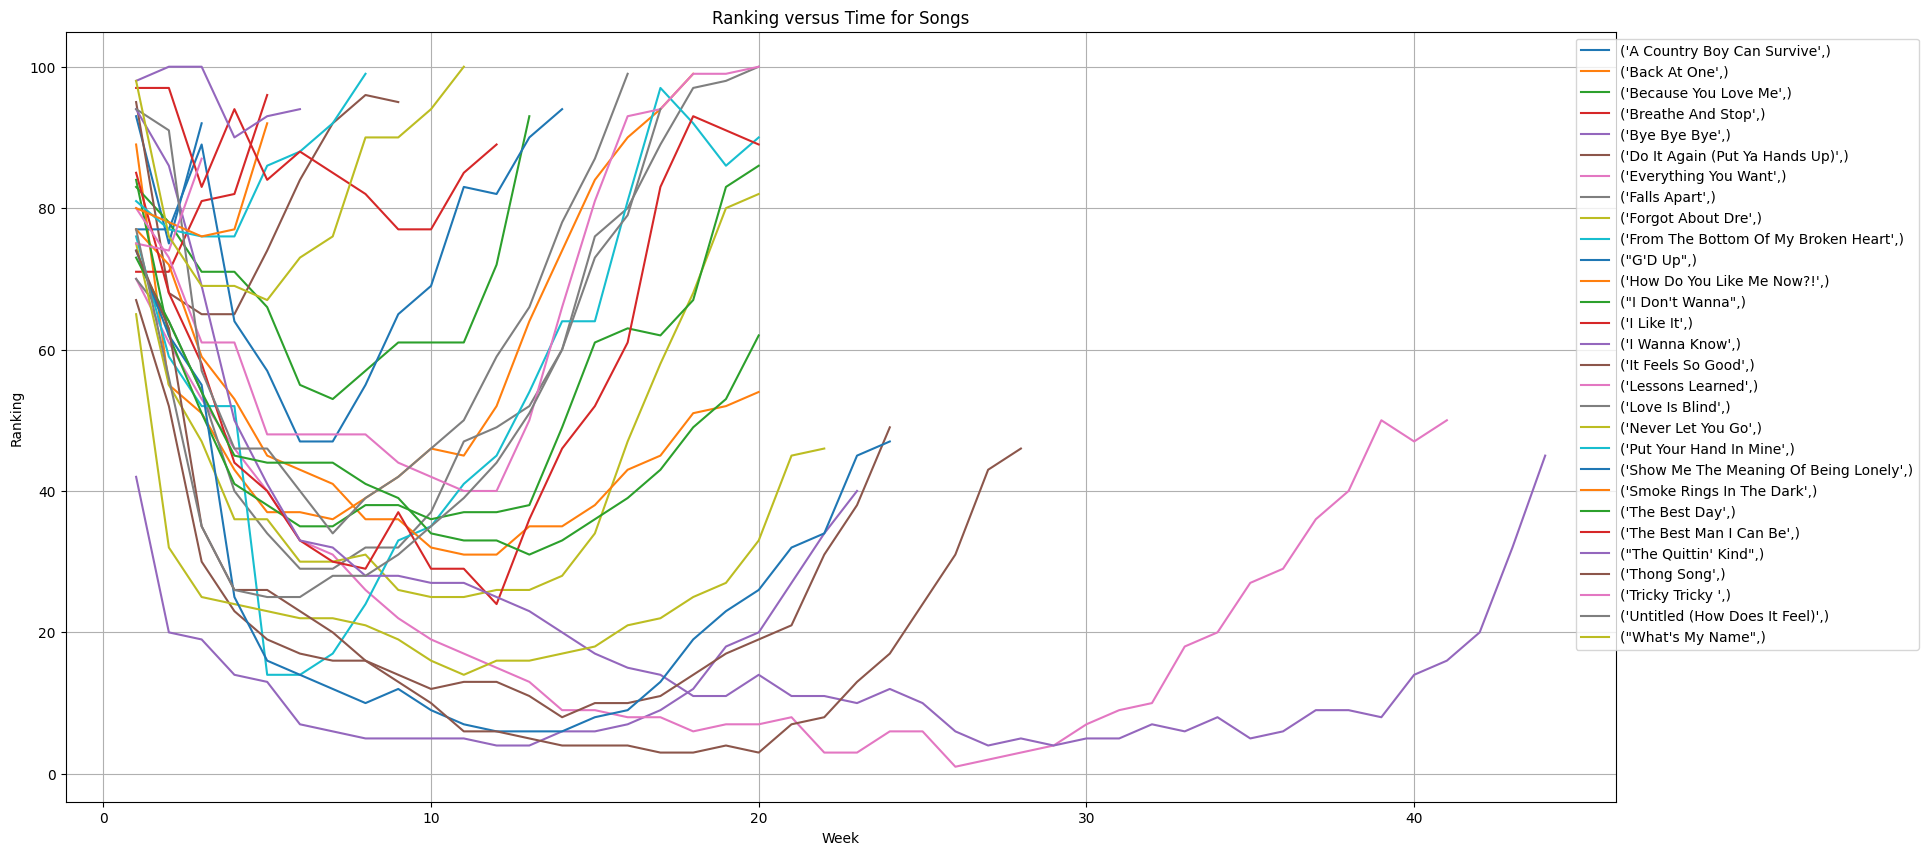

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

for name, group in df.groupby(['track']):
    plt.plot(group['week'], group['ranking'], label=name)


plt.xlabel('Week')
plt.ylabel('Ranking')
plt.title('Ranking versus Time for Songs')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.grid(True)

# Question 4 (3 marks)

For this question you will need:

1) The `geopandas` package (install it using conda). 

*Note that geopandas is built on top of pandas, so you can use pandas operations.*

2) A shapefile for Canadian provinces. To get this, go to <https://library.carleton.ca/find/gis/geospatial-data/shapefiles-canada-united-states-and-world> and then:

    - click "Statistics Canada 2021 cartographic boundary shapefile of provinces/territories"
    - select Type "Digital Boundary Files (DBF)"
    - select "Administrative boundaries"-> "Provinces/territories"
    - select "Format"->"Shapefile (.shp)"
    
Then "Continue" and download the zip file. Unzip it and move the whole folder to your working directory.

3) Some per-province employment data to display. Download the data from here: <https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410006601> 

Unzip it and move the whole folder to your working directory.


A) Run the following cells. Then select only the rows corresponding to the 10 provinces, and plot that.

In [8]:
import pandas as pd
import geopandas as gpd

<Axes: >

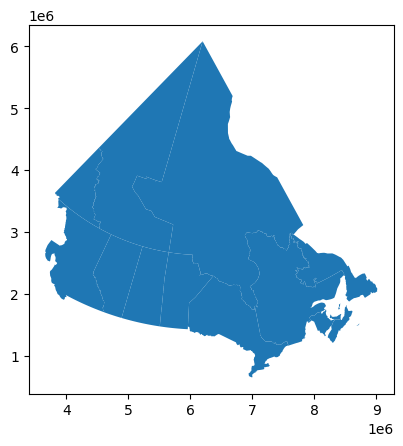

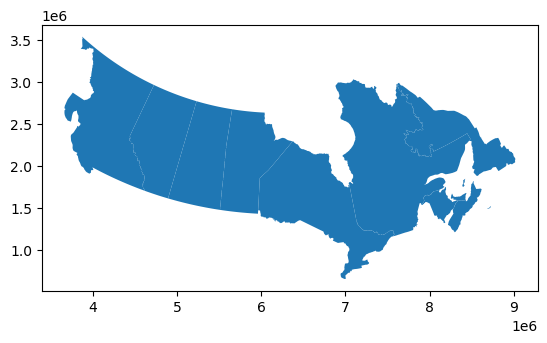

In [6]:
provterr = gpd.read_file('lpr_000a21a_e/lpr_000a21a_e.shp')
provterr.plot()
provs = provterr.loc[:9]
provs.plot()

B) Load the employment data into a Pandas dataframe.

Select only rows from 2021, with:

- 'Sex' == 'Both sexes'

- 'Age group' == '15 years and over'

- 'Wages' == 'Total employees, all wages'

- 'Job permanency' and 'Union coverage' both starting with 'Total'
    (hint: `.str.startswith('Total')`)
    
Select only the column containing the province names and the 'VALUE' column, which in this case is the total number of employees, in thousands.

Join this data to the geopandas dataframe you created in (A).

In [21]:
employment_df = pd.read_csv('1410006601_databaseLoadingData.csv')


employment_df[employment_df['Wages']]
#employment_df[employment_df['REF_DATE'] == 2021]
#employment_df[(employment_df['REF_DATE'] == 2021) & 
 #             (employment_df['Sex'] == 'Both sexes') &
  #            (employment_df['Age group'] == '15 years and over') &
   #           (employment_df['Wages'] == 'Total employees, all wages') & 
    #          (employment_df['Job permanency'].str.startswith('Total')) &
     #         (employment_df['Union coverage'].str.startswith('Total'))]

KeyError: "None of [Index(['Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate', 'Average hourly wage rate',\n       'Average hourly wage rate'],\n      dtype='object')] are in the [columns]"

C) Create a *choropleth* chart showing the total employment in each province, i.e. a map with provinces coloured according to the 'VALUE' column, with a legend.

*Hint:`prov.plot?`*